# Importing all required libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Show all columns
pd.set_option('display.max_rows', None)

# Import or Loading the banking data

In [2]:
# Import banking data
# Note: This data was extracted on 1999

# Each record describes characteristics of a client
client = pd.read_csv('../data/raw/data_berka/client.asc', sep=';')

# Each record describes static characteristics of an account
account = pd.read_csv('../data/raw/data_berka/account.asc', sep=';')

# Each record describes a credit card issued to an account
card = pd.read_csv('../data/raw/data_berka/card.asc', sep=';')

# Each record describes demographic characteristics of a district
district = pd.read_csv('../data/raw/data_berka/district.asc', sep=';')

# Each record relates together a client with an account
# i.e. this relation describes the rights of clients to operate accounts
disp = pd.read_csv('../data/raw/data_berka/disp.asc', sep=';')

# Each record describes characteristics of a payment order (debits only)
order = pd.read_csv('../data/raw/data_berka/order.asc', sep=';')

# Each record describes one transaction on an account
trans = pd.read_csv('../data/raw/data_berka/trans.asc', sep=';', low_memory=False)

# Each record describes a loan granted for a given account
loan = pd.read_csv('../data/raw/data_berka/loan.asc', sep=';')

# Client dataset
### Converting the date number to date format
### Deriving gender from date number
### Caculating the age and age group
### Deleting the unwanted columns from the dataset

In [3]:
#Converting the date number to date format
client['birth year'] = client['birth_number'].astype(str).str[0:2].astype(int)+ 1900
client['birth month'] = client['birth_number'].astype(str).str[2:4].astype(int)
client['birth day'] = client['birth_number'].astype(str).str[4:6].astype(int)

#Deriving gender from date number
client['gender'] = 'M'
client.loc[client['birth month']>50, 'gender'] = 'F'
client.loc[client['birth month']>50, 'birth month'] = client['birth month'] - 50

#Caculating the age and age group
client['age'] = 1996 - client['birth year'] 
client['age_group'] = client['age']//10*10

client['birth date'] = client.apply(lambda a: datetime(a['birth year'], a['birth month'], a['birth day']), axis = 1)

#Deleting the unwanted columns from the dataset
del client['birth_number'], client['birth month'], client['birth day'], client['birth year']

# Card Dataset
### Converting the date to proper date format
### Taking only the cards issued in 1997
### Deleting the unwanted columns

In [4]:
#Converting the date to proper date format
card['year'] = card['issued'].astype(str).str[0:2].astype(int)+ 1900
card['month'] = card['issued'].astype(str).str[2:4].astype(int)
card['day'] = card['issued'].astype(str).str[4:6].astype(int)

card['Card Issued Date'] = card.apply(lambda a: datetime(a['year'], a['month'], a['day']), axis = 1)

#Taking only the cards issued in 1997
card_1997 = card[card['year'] == 1997 ]
card_1997 = card_1997.reset_index()

card_1997['Issued_0/1'] = 1

#Deleting the unwanted columns
del card_1997['month'], card_1997['day'], card_1997['index'], card_1997['issued'], card_1997['year'], card_1997['Card Issued Date']

### Cards information which are issued before 1997 and Creation of new variable named 'Card Issued before 1997'

In [5]:
#Cards information which are issued before 1997
card_before1997 = card[card['year'] < 1997] 
del card_before1997['card_id'], card_before1997['issued'], card_before1997['year'], card_before1997['month'], card_before1997['day'], card_before1997['Card Issued Date']
#Creation of new variable named 'Card Issued before 1997'
card_before1997['Card Issued before 1997'] = 'Yes'

<ipython-input-5-a9b41f34b547>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_before1997['Card Issued before 1997'] = 'Yes'


# Loan dataset
### Converting the date number in loan dataset to proper date format
### Subsetting the loan data in 1997 and deleting the unwanted columns

In [6]:
#Converting the date number in loan dataset to proper date format
loan['year'] = loan['date'].astype(str).str[0:2].astype(int)+ 1900
loan['month'] = loan['date'].astype(str).str[2:4].astype(int)
loan['day'] = loan['date'].astype(str).str[4:6].astype(int)

loan['loan date'] = loan.apply(lambda a: datetime(a['year'], a['month'], a['day']), axis = 1)
del loan['month'], loan['day']
#Subsetting the loan data in 1997
loan_1997 = loan[loan['year'] == 1997]
loan_1997 = loan_1997.reset_index()

loan_1997['loan granted'] = 1

del loan_1997['index'], loan_1997['date'], loan_1997['duration'], loan_1997['status'], loan_1997['loan date'], loan_1997['year'], loan_1997['payments']

### Subsetting the loan data before 1997 and creation of new variable 'Loan granted before 1997'

In [7]:
#Subsetting the loan data before 1997
loan_before1997 = loan[loan['year']<1997]
del  loan_before1997['loan_id'], loan_before1997['date'], loan_before1997['year'], loan_before1997['loan date']
loan_before1997['status'] = loan_before1997['status'].map({'A': 'No Problems',
                                                          'B': 'Loan Not Payed',
                                                           'C': 'Ok so far',
                                                           'D': 'Client in debt'
                                                          })
loan_before1997['Loan granted before 1997'] = 'Yes'

<ipython-input-7-37468e22021d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_before1997['status'] = loan_before1997['status'].map({'A': 'No Problems',
<ipython-input-7-37468e22021d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_before1997['Loan granted before 1997'] = 'Yes'


# Demografic Dataset named as district.
### Renaming the district dataset columns

In [8]:
#Renaming the district dataset columns
district  = district.rename(columns = {'A1': 'district_id', 
                                       'A2':'district name',
                                       'A3': 'region',
                                       'A4': 'inhabitants',
                                       'A5': 'municipalities with inhabitants < 499',
                                       'A6': 'municipalities with inhabitants 500-1999',
                                       'A7': 'municipalities with inhabitants 2000-9999',
                                       'A8': 'municipalities with inhabitants >10000',
                                       'A9': 'cities',
                                       'A10': 'ratio of urban inhabitants',
                                       'A11': 'average salary',
                                       'A12': 'unemployment rate 1995',
                                       'A13': 'unemployment rate 1996',
                                       'A14': 'enterpreneurs per 1000 inhabitants',
                                       'A15': 'commited crimes 1995',
                                       'A16': 'commited crimes 1996'})

# Orders dataset
### Mapping the values of k_symbol columns with the proper description and pivoting them for better view and also creating the new variable 'total order payment'

In [9]:
#Mapping the values in k_symbol column in order dataset
order['k_symbol'] = order['k_symbol'].map({
    'SIPO' : 'household payment',
    'UVER' : 'loan payment', ' ': 'other', 'POJISTNE' : 'insurance payment', 'LEASING': 'lease'
})

#Pivoting k_symbol column with values in amount columns and filling the NULL values to 0
order = order.pivot_table(index=['account_id'], columns = 'k_symbol', values = 'amount', fill_value = 0)
order.columns.name = None
order = order.reset_index()

#Creation of 'total order payment' variable in order dataset
order['total order payment'] = order['household payment']+order['lease']+order['other']+order['loan payment'] + order['insurance payment']


# Transaction dataset
### Converting date number to proper date format

In [10]:
#Converting date number to proper date format
trans['year'] = trans['date'].astype(str).str[0:2].astype(int) + 1900
trans['month'] = trans['date'].astype(str).str[2:4].astype(int)
trans['day'] = trans['date'].astype(str).str[4:6].astype(int) 
trans['transaction_date'] = trans.apply(lambda a: datetime(a['year'], a['month'], a['day']), axis = 1)

del trans['date']

### Subsetting the dataframe for the year 1996 and then creating new 2 variables for total credit and total debit in the year 1996

In [11]:
trans96 = trans[trans['year']==1996]
# Aggregate the total credit per account
trans_agg_credit = trans96[trans96['type'].isin(['PRIJEM'])].groupby('account_id')['amount'].agg('sum')
trans_agg_credit = trans_agg_credit.reset_index()
trans_agg_credit = trans_agg_credit.rename(columns={'amount':'total_credit'})
trans_agg_credit.head()

# Aggregate the total withdrawal per account
trans_agg_withdrawal = trans96[trans96['type'].isin(['VYDAJ', 'VYBER'])].groupby('account_id')['amount'].agg('sum')
trans_agg_withdrawal = trans_agg_withdrawal.reset_index()
trans_agg_withdrawal = trans_agg_withdrawal.rename(columns={'amount':'total_withdrawal'})
trans_agg_withdrawal.head()

,account_id,total_withdrawal
0,1,55579.2
1,2,274574.2
2,4,31977.6
3,6,81803.2
4,7,6600.0


### Finding the monthly balance of each account based on the last transaction in the month by each client and then subsetting the balance balance dataframe for the year 1996 and then find the Average Monthly  balance and Median Monthly  balance

In [12]:
#Finding the monthly balances based on the last transation in the particular month.
trans_balance = trans[['account_id', 'year', 'month', 'day', 'balance']]
trans_balance = trans_balance.sort_values(['account_id', 'year', 'month', 'day'], ascending = [True, True, True, False])

def FindMonthEnd(df):
    df1 = pd.Series(0, index=df.index)
    df1.iloc[-1] = 1
    return df1

trans_balance["Month end"] = trans_balance.groupby(['account_id','year', 'month'])['day'].apply(FindMonthEnd)
trans_balance = trans_balance[trans_balance['Month end'] == 1]

#Subsetting the only for 1996 data
trans_balance = trans_balance[trans_balance['year'] == 1996]
del trans_balance['year'], trans_balance['month'], trans_balance['day'], trans_balance['Month end']

#Creating the dataframe with with account ID and mean and median of balances
trans_balance = trans_balance.groupby('account_id').agg( {'balance':['mean', 'median']}) 
trans_balance.columns = ['Average Monthly Balance', 'Median Monthly Balance']

trans_balance.columns.name = None
trans_balance = trans_balance.reset_index()




### Mapping the values in the operation columns with the proper description and pivoting them for the better view of the table
### Subsetting the obtained transaction dataframe for the year 1996
### Created 2 variable called 'Total Credit' and 'Total debit' for each month based on pivoted operation column and calculated the monthly savings i.e Total Credit - Total Debit

In [13]:
#Mapping the values in the operation columns 
trans['operation'] = trans['operation'].map({
    'VKLAD': 'Credit in Cash', 'PREVOD Z UCTU': 'Collection from another bank' , 'VYBER':'withdrawal in cash', 
    'PREVOD NA UCET': 'remittance to another bank',
       'VYBER KARTOU': 'remittance to another bank',
})
trans.loc[trans['operation'].isna(), 'operation'] = 'Interest Credited'

#Pivoting the data set with operation column
trans = trans.pivot_table(index = ['account_id', 'transaction_date', 'balance', 'month', 'year'], columns = 'operation', 
                          values = 'amount', fill_value = 0)

trans.columns.name = None
trans = trans.reset_index()

#Subsetting transations for 1996
trans_96 = trans[trans['year'] == 1996]
del trans_96['year'], trans_96['balance']

trans_96 = trans_96.groupby(['account_id', 'month']).agg('sum')

trans_96.columns.name = None
trans_96 = trans_96.reset_index()

trans_96['Total Credit'] = trans_96['Collection from another bank'] + trans_96['Credit in Cash'] + trans_96['Interest Credited']
trans_96['Total Debit'] = trans_96['remittance to another bank'] + trans_96['withdrawal in cash']

trans_96['monthly savings'] = trans_96['Total Credit'] - trans_96['Total Debit']
trans_96 = trans_96.groupby('account_id').agg('mean')

trans_96.columns.name = None
trans_96 = trans_96.reset_index()

#Renaming the columns
trans_96 = trans_96.rename(columns = {'Collection from another bank': 'Average Collection from another bank' , 
                                      'Credit in Cash' : 'Average Credit in Cash' ,
                                      'Interest Credited':'Average Interest Credited', 
                                      'remittance to another bank' : 'Average remittance to another bank' ,
                                      'withdrawal in cash': 'Average withdrawal in cash',
                                      'Total Credit' : 'Average Total Credit', 
                                      'Total Debit' : 'Average Total Debit', 
                                      'monthly savings': 'Average Monthly Savings'})

### Merging all the dataframes created using transaction dataset as transaction_summary to get the summary of the transaction of each client in the year 1996

In [14]:
#Creation of a dataset by merging transactions in 1996 with the transaction balance dataset
transaction_summary = pd.merge(trans_96, trans_balance, on = 'account_id')
del transaction_summary['month']

In [15]:
#Creation of a dataset by merging transactions in 1996 with total credits and debit datasets
transaction_summary = pd.merge(transaction_summary, trans_agg_credit, how='left', on='account_id')
transaction_summary = pd.merge(transaction_summary, trans_agg_withdrawal, how='left', on='account_id')

# Account dataset
### Converting the date number to proper date format
### Subsetting accounts data before 1996
### Mapping the frequency column with proper description for better understanding and deleting the unwanted columns

In [16]:
#Converting the date number to proper date format
account['open year'] = account['date'].astype(str).str[0:2].astype(int) + 1900
account['open month'] = account['date'].astype(str).str[2:4].astype(int)
account['day'] = account['date'].astype(str).str[4:6].astype(int)
account['open_date'] = account.apply(lambda a: datetime(a['open year'], a['open month'], a['day']), axis = 1)
account['LOR'] = 1996 - account['open year']

#Subsetting accounts data before 1997
account = account[account['open year'] < 1996]

account['frequency'] = account['frequency'].map({'POPLATEK MESICNE':'Monthly Issuance',
                                                'POPLATEK TYDNE': 'Weekly Issuance',
                                                'POPLATEK PO OBRATU': 'Issuance after transaction'})



del account['date'], account['open month'], account['day'], account['open year'], account['open_date']

# Merging all the DataFrames to get the basetable 
### Merging and performing the necessary cleaning like filling NaN,changing the column names...

In [17]:
#Merging client dataframe with disponent dataframe and creating required columns
client_disp = pd.merge(client, disp, on = 'client_id', how = 'left')
client_disp['can apply loan?'] = 'Yes'
client_disp.loc[client_disp['type']== 'DISPONENT', 'can apply loan?'] = 'No'
client_disp['permanent orders applicable?'] = 'Yes'
client_disp.loc[client_disp['type']== 'DISPONENT', 'permanent orders applicable?'] = 'No'

#Merging the above created dataframe with district dataframe
client_dist = pd.merge(client_disp, district, on = 'district_id')

#Merging the above created dataframe with account dataframe
client_account = pd.merge(client_dist, account, on = 'account_id')

#Merging the above created dataframe with transaction_summary dataframe
client_transaction = pd.merge(client_account,transaction_summary, on = 'account_id')

#Merging the above created dataframe with order dataframe
client_order = pd.merge(client_transaction, order, on = 'account_id', how = 'left')

#Merging the above created dataframe with card_1997 dataframe and filling the null values with 0
client_card = pd.merge(client_order, card_1997, on = 'disp_id', how = 'left')
client_card['Issued_0/1'] = client_card['Issued_0/1'].fillna(0)

#Merging the above created dataframe with loan_1997 dataframe and filling the null values with 0
client_loan = pd.merge(client_card, loan_1997, on = 'account_id', how = 'left' )
client_loan['loan granted'] = client_loan['loan granted'].fillna(0)
client_loan.loc[client_loan['type_x']=='DISPONENT','loan granted'] = 0

#Subsetting the above dataframe with owner account type
client_loan = client_loan[client_loan['type_x'] == 'OWNER']

#dropping unwanted columns, sorting the observations and filling null or nan values with 0
client_loan = client_loan.drop(columns = ['card_id', 'type_y','loan_id', 'amount','district_id_y','commited crimes 1995','unemployment rate 1995', 'type_x', 'can apply loan?','permanent orders applicable?'])
client_loan = client_loan.sort_values('account_id')
client_loan[['total_withdrawal','household payment', 'insurance payment', 'lease',
                                     'loan payment', 'other', 'total order payment','total_credit']] = client_loan[['total_withdrawal','household payment', 'insurance payment', 'lease',
                                                                                         'loan payment', 'other', 'total order payment','total_credit']].fillna(0)
#Converting the datatype to int and renaming the columns
client_loan[['Issued_0/1','loan granted' ]] = client_loan[['Issued_0/1','loan granted' ]].astype(float).astype(int)
client_loan = client_loan.rename(columns = {'type_x': 'account type', 
                                                     'Issued_0/1':'Card Issued',
                                                     'district_id_x': 'district_id'})
client_loan = client_loan.reset_index()
del client_loan['index']

##Merging the above created dataframe with card_before1997 dataframe 
client_cardbefore1997 = pd.merge(client_loan, card_before1997, on = 'disp_id', how = 'left')

#Merging the above created dataframe with loan_before1997 dataframe
client_basetable = pd.merge(client_cardbefore1997, loan_before1997, on = 'account_id', how = 'left')

In [18]:
#Renaming the column names and filling the NA values with Not Applicable in which the clients have no cards and loans before
#1997
client_basetable = client_basetable.rename(columns = {'type':'Card Type',
                                                     'amount': 'Loan Amount',
                                                     'duration': 'Loan Duration',
                                                     'payments': 'Loan Payments',
                                                     'Status': 'Loan Status'})

client_basetable[['Card Type', 'Card Issued before 1997', 'Loan Amount',
       'Loan Duration', 'Loan Payments', 'status', 'Loan granted before 1997']] = client_basetable[['Card Type', 'Card Issued before 1997', 'Loan Amount',
       'Loan Duration', 'Loan Payments', 'status', 'Loan granted before 1997']].fillna('Not Applicable')

In [19]:
#Rearranging the Columns
client_basetable = client_basetable[['client_id', 'district_id', 'gender', 'age', 'age_group', 'birth date',
       'disp_id', 'account_id', 'district name', 'region', 'inhabitants',
       'municipalities with inhabitants < 499',
       'municipalities with inhabitants 500-1999',
       'municipalities with inhabitants 2000-9999',
       'municipalities with inhabitants >10000', 'cities',
       'ratio of urban inhabitants', 'average salary',
       'unemployment rate 1996', 'enterpreneurs per 1000 inhabitants',
       'commited crimes 1996', 'frequency', 'LOR',
       'Average Collection from another bank', 'Average Credit in Cash',
       'Average Interest Credited', 'Average remittance to another bank',
       'Average withdrawal in cash', 'Average Total Credit',
       'Average Total Debit', 'Average Monthly Savings',
       'Average Monthly Balance', 'Median Monthly Balance', 'total_credit',
       'total_withdrawal', 'household payment', 'insurance payment', 'lease',
       'loan payment', 'other', 'total order payment', 'Card Type', 'Card Issued before 1997', 'Loan Amount',
       'Loan Duration', 'Loan Payments', 'status', 'Loan granted before 1997','Card Issued',
       'loan granted']]

In [20]:
client_basetable

,client_id,district_id,gender,age,age_group,birth date,disp_id,account_id,district name,region,...,total order payment,Card Type,Card Issued before 1997,Loan Amount,Loan Duration,Loan Payments,status,Loan granted before 1997,Card Issued,loan granted
0,1,18,F,26,20,1970-12-13,1,1,Pisek,south Bohemia,...,2452.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
1,2,1,M,51,50,1945-02-04,2,2,Hl.m. Praha,Prague,...,10638.7,Not Applicable,Not Applicable,80952.0,24.0,3373.0,No Problems,Yes,0,0
2,8,51,F,58,50,1938-02-21,8,6,Trutnov,east Bohemia,...,3954.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
3,10,57,M,53,50,1943-05-01,10,8,Hodonin,south Moravia,...,9324.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
4,12,40,M,15,10,1981-02-20,12,9,Teplice,north Bohemia,...,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
5,14,76,F,54,50,1942-06-22,14,11,Sumperk,north Moravia,...,2132.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
6,20,46,M,17,10,1979-01-04,20,15,Nachod,east Bohemia,...,3072.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
7,24,43,F,57,50,1939-07-29,24,18,Hradec Kralove,east Bohemia,...,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
8,25,21,F,57,50,1939-04-23,25,19,Tabor,south Bohemia,...,2523.2,Not Applicable,Not Applicable,30276.0,12.0,2523.0,Loan Not Payed,Yes,0,0
9,28,1,M,51,50,1945-09-29,28,22,Hl.m. Praha,Prague,...,6352.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0


# Exporting the basetable created .csv file

In [58]:
#Creation of csv file for the basetable
client_basetable.to_csv(path_or_buf = '../data/processed/basetable.csv', index = False)

# Visualization and Analysis on given dataset tables

No handles with labels found to put in legend.


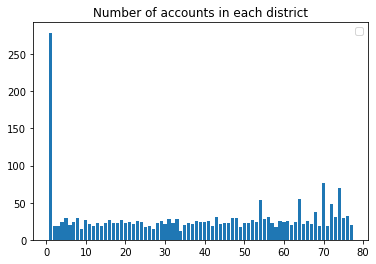

In [22]:
#number of account per district
account_district = account.groupby('district_id')['account_id'].count()
# Initiate the plot
fig, ax = plt.subplots()
#bar chart
ax.bar(account_district.index,account_district)
plt.title('Number of accounts in each district')
ax.legend()

district_id 1 have the most and a high number of accounts

No handles with labels found to put in legend.


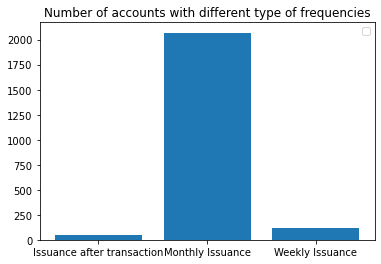

In [23]:
account_freq = account.groupby('frequency')['account_id'].count()
account_freq.head()
# Initiate the plot
fig, ax = plt.subplots()
#bar chart
ax.bar(account_freq.index,account_freq)
plt.title('Number of accounts with different type of frequencies')
ax.legend()

most of the customers prefer monthly issuance frequency

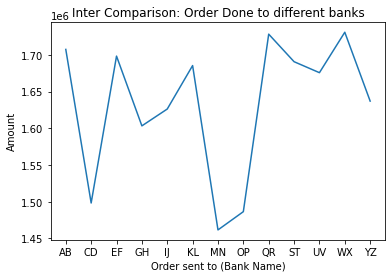

In [24]:
order1 = pd.read_csv('../data/raw/data_berka/order.asc',sep=';')
order1
#amount sent to banks
order1group = order1.groupby('bank_to')['amount'].sum()
order1group
# Initiate the plot
plt.plot(order1group.index,order1group)
plt.title('Inter Comparison: Order Done to different banks')
plt.xlabel('Order sent to (Bank Name)')
plt.ylabel('Amount')
plt.show()

Shows the bank to whom the transactions are done most and to whom the least

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


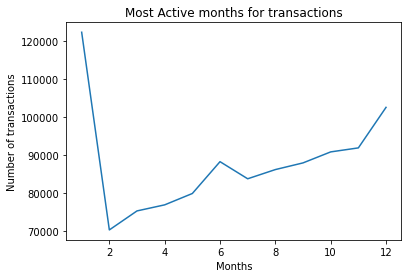

In [25]:
trans1 = pd.read_csv('../data/raw/data_berka/trans.asc',sep=';')
trans1['year'] = trans1['date'].astype(str).str[0:2].astype(int) + 1900
trans1['month'] = trans1['date'].astype(str).str[2:4].astype(int)
trans1['day'] = trans1['date'].astype(str).str[4:6].astype(int) 

trans1group = trans1.groupby(['month']).count()
trans1group.head()
#plot to show the most transaction months
# Initiate the plot
plt.plot(trans1group.index,trans1group['trans_id'])
plt.title('Most Active months for transactions')
plt.xlabel('Months')
plt.ylabel('Number of transactions')
plt.show()

Number of Transanction are highest during Christmas and New Year

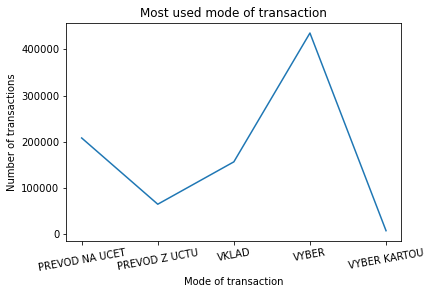

In [26]:
trans1['k_symbol'] = trans1['k_symbol'].map({
    'POJISTNE': 'Insurance Payment', 'SLUZBY': 'Payment for Statement' , 'UROK':'interest credited', 
    'SANKC. UROK': 'interest if negative balance','DUCHOD': 'old-age pension',
       'SIPO': 'household', 'UVER': 'loan payment'
})

trans2group = trans1.groupby(['operation']).count()
trans2group
# the most preferred mode of payment
# Initiate the plot
plt.plot(trans2group.index,trans2group['trans_id'])
plt.title('Most used mode of transaction')
plt.xlabel('Mode of transaction')
plt.ylabel('Number of transactions')
plt.xticks(rotation=10)
plt.show()

Cash withdrawal is the most preferred mode of payment

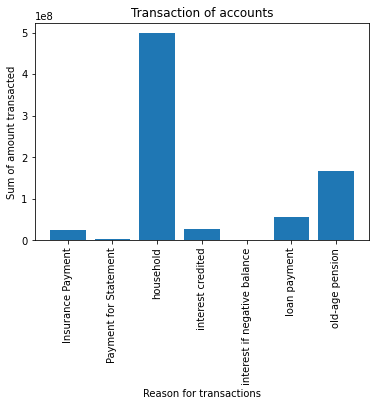

In [27]:
trans3group = trans1.groupby(['k_symbol']).sum().reset_index()
trans3group
# comparison between different transaction reason of accounts
# Initiate the plot
plt.bar(trans3group['k_symbol'],trans3group['amount'])
plt.title('Transaction of accounts')
plt.xlabel('Reason for transactions')
plt.ylabel('Sum of amount transacted')
plt.xticks(rotation=90)
plt.show()

household transactions are the most in number

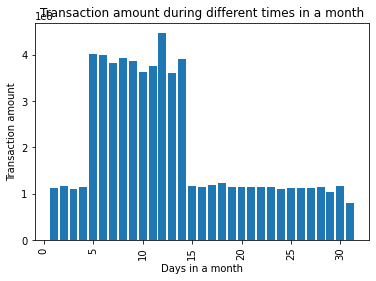

In [28]:
trans4group = trans1.groupby(['day']).sum().reset_index()
trans4group.head()
# amount transacted in accounts from starting day of month to end day
# Initiate the plot
plt.bar(trans4group['day'],trans4group['amount'])
plt.title('Transaction amount during different times in a month')
plt.xlabel('Days in a month')
plt.ylabel('Transaction amount')
plt.xticks(rotation=90)
plt.show()

It seems people get their salaries after 5th of every month

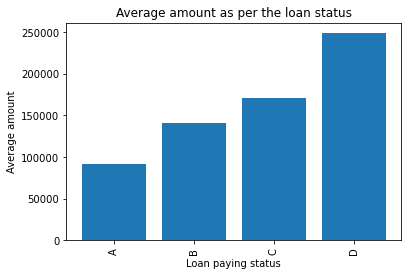

In [29]:
loan1group = loan.groupby(['status']).mean().reset_index()
#number of people having loan according to their loan status
loan1group.head()
#average stats of bank for loan
# Initiate the plot
plt.bar(loan1group['status'],loan1group['amount'])
plt.title('Average amount as per the loan status')
plt.xlabel('Loan paying status')
plt.ylabel('Average amount')
plt.xticks(rotation=90)
plt.show()

It seems most of the loan money is in debt as D means running contract, client in debt

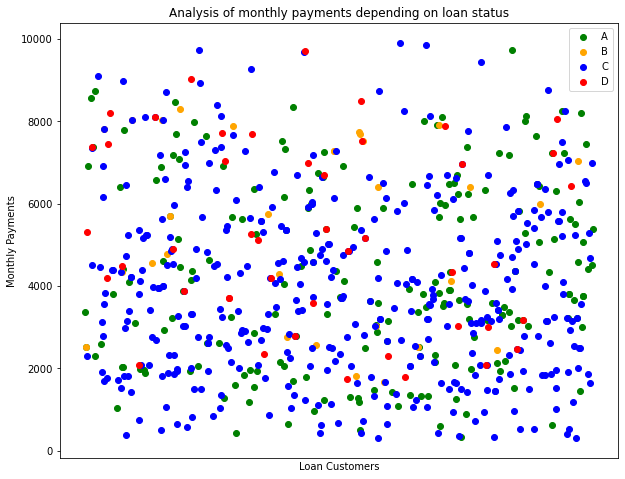

In [30]:
# Plot Average Total Credit - Debit for Card Issued Status

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(loan[loan['status'] == 'A']['loan_id'],loan[loan['status'] == 'A']['payments'], color='green', label="A")
ax.scatter(loan[loan['status'] == 'B']['loan_id'],loan[loan['status'] == 'B']['payments'], color='orange', label="B")
ax.scatter(loan[loan['status'] == 'C']['loan_id'],loan[loan['status'] == 'C']['payments'], color='blue', label="C")
ax.scatter(loan[loan['status'] == 'D']['loan_id'],loan[loan['status'] == 'D']['payments'], color='red', label="D")
ax.set_xlabel('Loan Customers')
ax.set_ylabel('Monthly Payments')
ax.set_title('Analysis of monthly payments depending on loan status')
plt.tick_params(
    axis='x',     
    which='both',     
    bottom=False,  
    top=False,        
    labelbottom=False)
ax.legend()

plt.show()

No pattern based on monthly payments to analyse why loan status D clients are in debt.
Similarly no relation between status D and duration or amount

([<matplotlib.patches.Wedge at 0x1c50b275e80>,
 [Text(-0.8863002442836034, 0.9510372637193694, 'Classic'),
  Text(0.2846530355216117, -1.1657498228043324, 'Gold'),
  Text(1.0468920231708088, -0.586529702420373, 'Junior')])

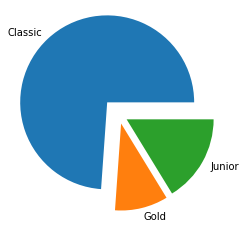

In [31]:
card1group = card.groupby('type')['card_id'].count()
cardsum = card1group.sum()
card1group = card1group/cardsum
card1group
#division of customers by card type
plt.pie(card1group,labels=['Classic','Gold','Junior'], explode = [0.2,0.1,0.1])

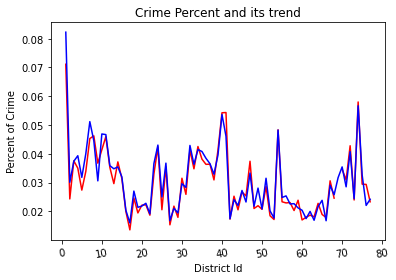

In [32]:
district1 = district
#analysis of number of people commited crimes
district1['commited crimes 1995'] = pd.to_numeric(district['commited crimes 1995'], errors = 'coerce')
district1['crimePercent1995'] = district1['commited crimes 1995'] / district1['inhabitants']
district1['commited crimes 1996'] = pd.to_numeric(district['commited crimes 1996'], errors = 'coerce')
district1['crimePercent1996'] = district1['commited crimes 1996'] / district1['inhabitants']
#del district1['crimePercent']
district1.head()

# the crime percent insight
# Initiate the plot
plt.plot(district1['district_id'],district1['crimePercent1995'], color='red')
plt.plot(district1['district_id'],district1['crimePercent1996'], color='blue')
plt.title('Crime Percent and its trend')
plt.xlabel('District Id')
plt.ylabel('Percent of Crime')
plt.xticks(rotation=10)
plt.show()

Other than slight difference, nothing changed much between 1995 and 1996 in each district crime percent

# Basetable Analysis and Visualization

In [33]:
basetable = pd.read_csv('../data/processed/basetable.csv')
basetable.head()

,client_id,district_id,gender,age,age_group,birth date,disp_id,account_id,district name,region,...,total order payment,Card Type,Card Issued before 1997,Loan Amount,Loan Duration,Loan Payments,status,Loan granted before 1997,Card Issued,loan granted
0,1,18,F,26,20,1970-12-13,1,1,Pisek,south Bohemia,...,2452.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
1,2,1,M,51,50,1945-02-04,2,2,Hl.m. Praha,Prague,...,10638.7,Not Applicable,Not Applicable,80952.0,24.0,3373.0,No Problems,Yes,0,0
2,8,51,F,58,50,1938-02-21,8,6,Trutnov,east Bohemia,...,3954.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
3,10,57,M,53,50,1943-05-01,10,8,Hodonin,south Moravia,...,9324.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
4,12,40,M,15,10,1981-02-20,12,9,Teplice,north Bohemia,...,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0


In [34]:
basetable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   client_id                                  2239 non-null   int64  
 1   district_id                                2239 non-null   int64  
 2   gender                                     2239 non-null   object 
 3   age                                        2239 non-null   int64  
 4   age_group                                  2239 non-null   int64  
 5   birth date                                 2239 non-null   object 
 6   disp_id                                    2239 non-null   int64  
 7   account_id                                 2239 non-null   int64  
 8   district name                              2239 non-null   object 
 9   region                                     2239 non-null   object 
 10  inhabitants             

<AxesSubplot:title={'center':'Clients distribution per age'}, ylabel='Frequency'>

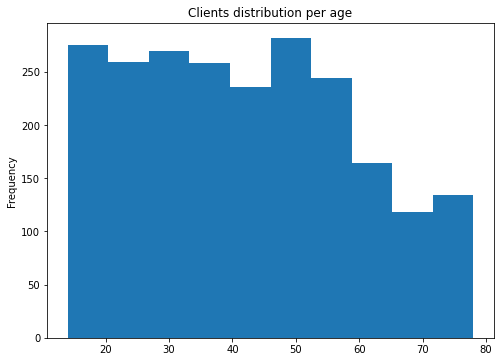

In [35]:
#plotting customers distribution by age
basetable['age'].plot (kind = 'hist', 
                       title = 'Clients distribution per age',
                       xlabel = 'age',
                       # width = 0.75,
                       figsize = (8, 5.8))

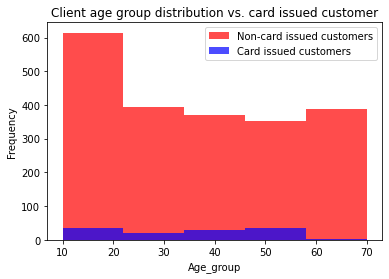

In [36]:
# Initiate the plot
fig, ax = plt.subplots()
# Bar plot
ax.hist(basetable[basetable['Card Issued'] == 0]['age_group'], bins=5, color='Red', alpha=0.7, label='Non-card issued customers')
ax.hist(basetable[basetable['Card Issued'] == 1]['age_group'], bins=5, color='Blue', alpha=0.7, label='Card issued customers')
ax.set_title('Client age group distribution vs. card issued customer')
ax.set_xlabel('Age_group')
ax.set_ylabel('Frequency')
ax.legend()

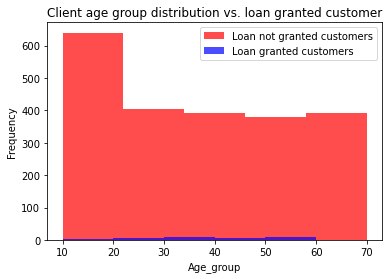

In [37]:
# Initiate the plot
fig, ax = plt.subplots()
# Bar plot
ax.hist(basetable[basetable['loan granted'] == 0]['age_group'], bins=5, color='Red', alpha=0.7, label='Loan not granted customers')
ax.hist(basetable[basetable['loan granted'] == 1]['age_group'], bins=5, color='Blue', alpha=0.7, label='Loan granted customers')
ax.set_title('Client age group distribution vs. loan granted customer')
ax.set_xlabel('Age_group')
ax.set_ylabel('Frequency')
ax.legend()

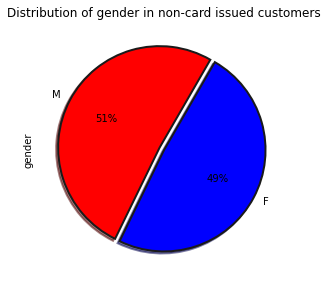

In [57]:
# Gender
fig = plt.figure(figsize=(10,6))
plt.subplot(121)
basetable[basetable["Card Issued"] == 0]["gender"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","blue"],startangle = 60,
                                                                           wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("Distribution of gender in non-card issued customers")
plt.show()

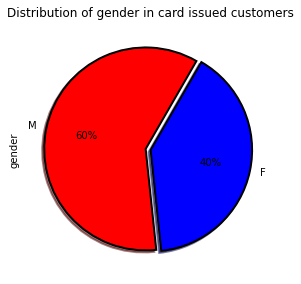

In [39]:
fig = plt.figure(figsize=(10,6))
plt.subplot(121)
basetable[basetable["Card Issued"] == 1]["gender"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","blue"],startangle = 60,
                                                                           wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("Distribution of gender in card issued customers")
plt.show()

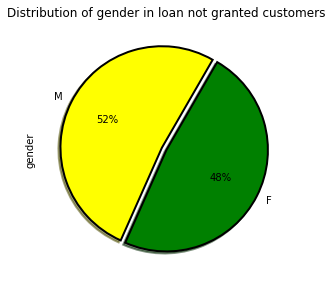

In [40]:
fig = plt.figure(figsize=(10,6))
plt.subplot(121)
basetable[basetable["loan granted"] == 0]["gender"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["yellow","green"],startangle = 60,
                                                                           wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("Distribution of gender in loan not granted customers")
plt.show()

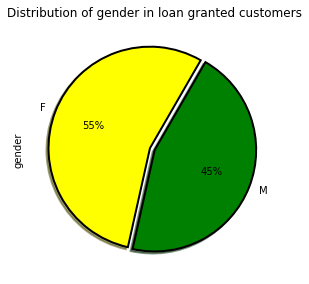

In [41]:
fig = plt.figure(figsize=(10,6))
plt.subplot(121)
basetable[basetable["loan granted"] == 1]["gender"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["yellow","green"],startangle = 60,
                                                                           wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("Distribution of gender in loan granted customers")
plt.show()

Text(0.5, 1.0, 'Card issued status vs. number of inhabitants')

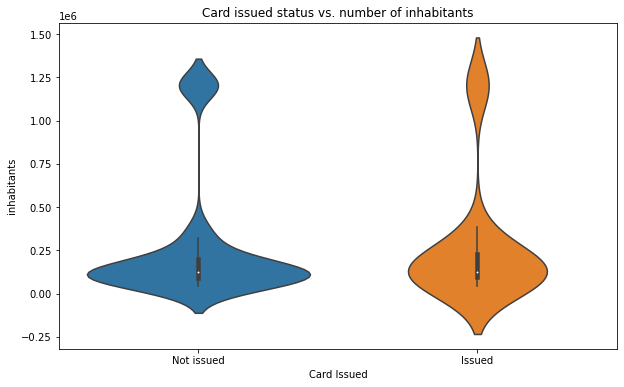

In [42]:
# Plot Card issued status vs. number of inhabitants
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.violinplot(x="Card Issued", y="inhabitants", data=basetable)
ax.set_xticklabels(["Not issued","Issued"])
ax.set_title("Card issued status vs. number of inhabitants")

Text(0.5, 1.0, 'Loan granted status vs. number of inhabitants')

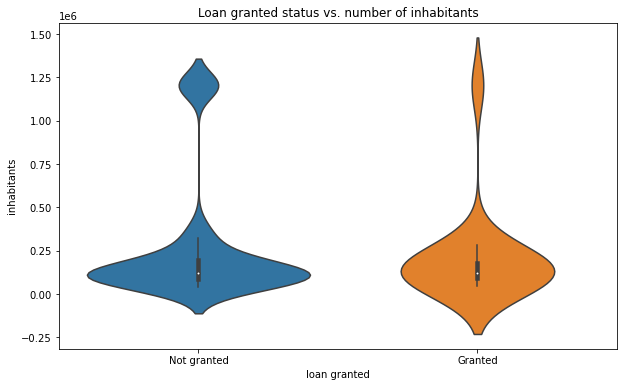

In [43]:
# Plot Loan granted status vs. number of inhabitants
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.violinplot(x="loan granted", y="inhabitants", data=basetable)
ax.set_xticklabels(["Not granted","Granted"])
ax.set_title("Loan granted status vs. number of inhabitants")

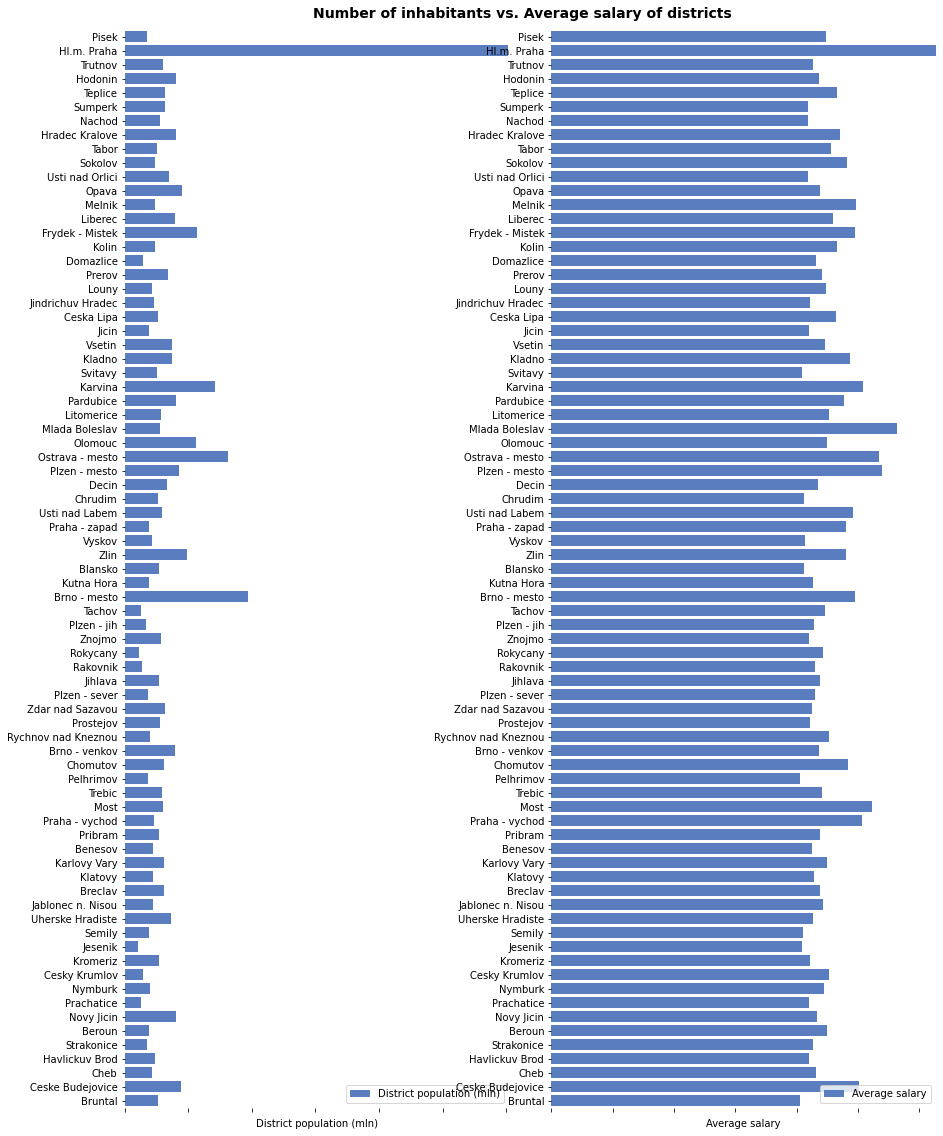

In [44]:
# Plot Number of inhabitants vs. Average salary of districts

basetable_df = basetable.copy ()
basetable_df['inhabitants'] = basetable_df['inhabitants'] / 1000000 

## Initialize the matplotlib figure:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,16), sharey=False)
fig2.tight_layout()  
fig2.subplots_adjust(top=0.96)  #Adjusting the space for the superior title

## Plot the District population
sns.set_color_codes("muted")
sns.barplot(x="inhabitants", y="district name", data=basetable_df, label = 'District population (mln)',color="b", ax=ax1)
## Add a legend and informative axis label
ax1.legend(ncol=2, loc="lower right", frameon=True)
ax1.set(xlim=(0, 1.21), ylabel="", xlabel="District population (mln)")
ax1.set_xticklabels([])
sns.despine(left=True, bottom=True,ax=ax1)

## Plot the Average salary
sns.set_color_codes("muted")
sns.barplot(x="average salary", y="district name", data=basetable_df, label="Average salary", color="b", ax=ax2)
## Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
ax2.set(xlim=(0, 12541), ylabel="", xlabel="Average salary")  #The xlim value comes from the maximum value in the dataset.
ax2.set_xticklabels([])
sns.despine(left=True, bottom=True, ax=ax2)

plt.suptitle('Number of inhabitants vs. Average salary of districts', fontsize=14, fontweight='bold')
plt.show()

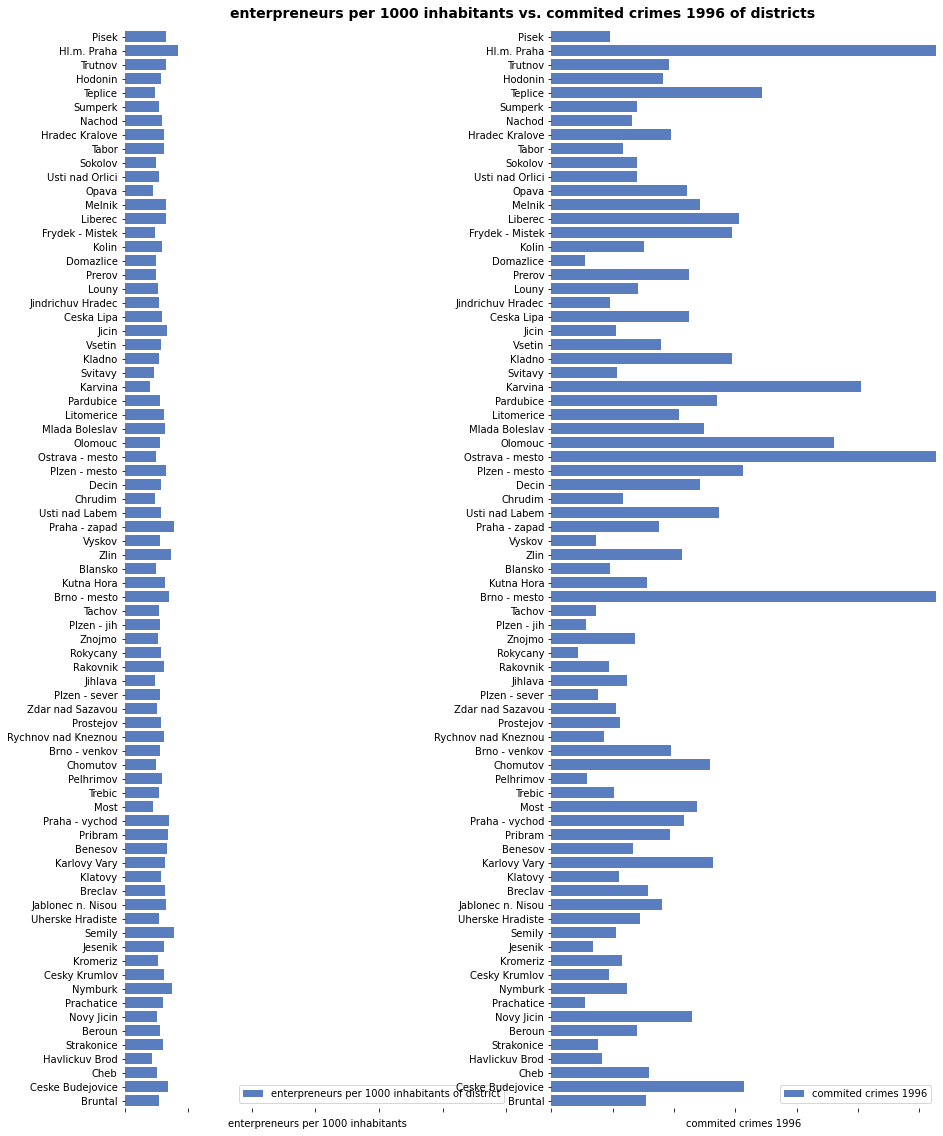

In [45]:
# Plot enterpreneurs per 1000 inhabitants vs. Average salary of districts
basetable_df['enterpreneurs per 1000 inhabitants'] = basetable_df['enterpreneurs per 1000 inhabitants'] / 1000
## Initialize the matplotlib figure:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,16), sharey=False)
fig2.tight_layout() 
fig2.subplots_adjust(top=0.96)  #Adjusting the space for the superior title

## Plot the District population
sns.set_color_codes("muted")
sns.barplot(x="enterpreneurs per 1000 inhabitants", y="district name", data=basetable_df, label = 'enterpreneurs per 1000 inhabitants of district',color="b", ax=ax1)
## Add a legend and informative axis label
ax1.legend(ncol=2, loc="lower right", frameon=True)
ax1.set(xlim=(0, 1.21), ylabel="", xlabel="enterpreneurs per 1000 inhabitants")
ax1.set_xticklabels([])
sns.despine(left=True, bottom=True,ax=ax1)

## Plot the Average salary
sns.set_color_codes("muted")
sns.barplot(x="commited crimes 1996", y="district name", data=basetable_df, label="commited crimes 1996", color="b", ax=ax2)
## Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
ax2.set(xlim=(0, 12541), ylabel="", xlabel="commited crimes 1996")  #The xlim value comes from the maximum value in the dataset.
ax2.set_xticklabels([])
sns.despine(left=True, bottom=True, ax=ax2)

plt.suptitle('enterpreneurs per 1000 inhabitants vs. commited crimes 1996 of districts', fontsize=14, fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Card issued status vs. Ratio of urban inhabitants ')

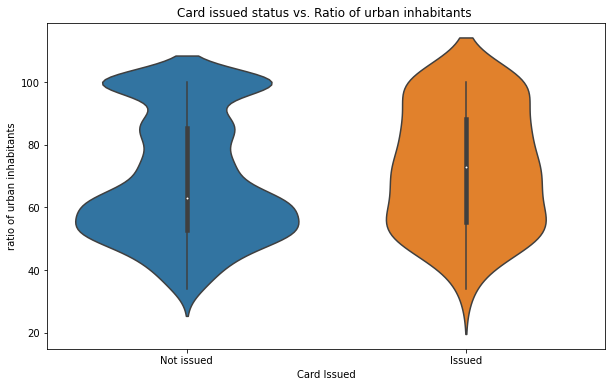

In [46]:
# Plot Card issued status vs. Ratio of urban inhabitants
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.violinplot(x="Card Issued", y="ratio of urban inhabitants", data=basetable)
ax.set_xticklabels(["Not issued","Issued"])
ax.set_title("Card issued status vs. Ratio of urban inhabitants ")

Text(0.5, 1.0, 'Loan granted status vs. Ratio of urban inhabitants')

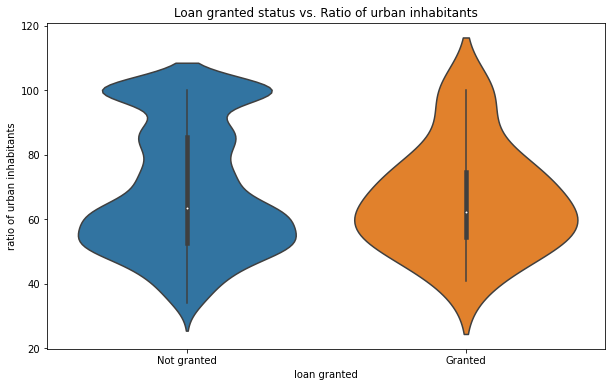

In [47]:
# Plot Loan granted status vs. Ratio of urban inhabitants
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.violinplot(x="loan granted", y="ratio of urban inhabitants", data=basetable)
ax.set_xticklabels(["Not granted","Granted"])
ax.set_title("Loan granted status vs. Ratio of urban inhabitants")

In [48]:
basetable_df.head()

,client_id,district_id,gender,age,age_group,birth date,disp_id,account_id,district name,region,...,total order payment,Card Type,Card Issued before 1997,Loan Amount,Loan Duration,Loan Payments,status,Loan granted before 1997,Card Issued,loan granted
0,1,18,F,26,20,1970-12-13,1,1,Pisek,south Bohemia,...,2452.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
1,2,1,M,51,50,1945-02-04,2,2,Hl.m. Praha,Prague,...,10638.7,Not Applicable,Not Applicable,80952.0,24.0,3373.0,No Problems,Yes,0,0
2,8,51,F,58,50,1938-02-21,8,6,Trutnov,east Bohemia,...,3954.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
3,10,57,M,53,50,1943-05-01,10,8,Hodonin,south Moravia,...,9324.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0
4,12,40,M,15,10,1981-02-20,12,9,Teplice,north Bohemia,...,0.0,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0,0


<ipython-input-49-986eaee08492>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


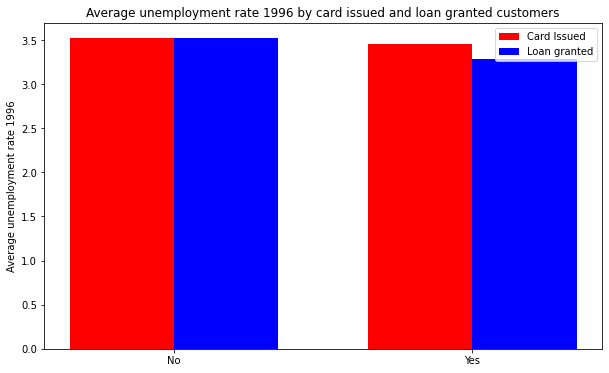

In [49]:
# Plot Unemployment rate 1996 by card issued and loan granted customers

avg_unemploy_card = basetable_df.groupby('Card Issued')['unemployment rate 1996'].agg(['mean'])
avg_unemploy_loan = basetable_df.groupby('loan granted')['unemployment rate 1996'].agg(['mean'])

fig, ax = plt.subplots(figsize=(10,6))
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'No'
labels[1] = 'Yes'
ax.set_xticklabels(labels)

width = 0.35      
plt.bar(avg_unemploy_card.index, avg_unemploy_card['mean'], width, color='red', label='Card Issued')
plt.bar(avg_unemploy_loan.index + width, avg_unemploy_loan['mean'], width, color='blue', label='Loan granted')

fig.canvas.draw()

plt.ylabel('Average unemployment rate 1996')
plt.title('Average unemployment rate 1996 by card issued and loan granted customers')
ax.legend()
ax.set_xticks([0.175, 1.175])

plt.show()

<ipython-input-50-1646f86456f2>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


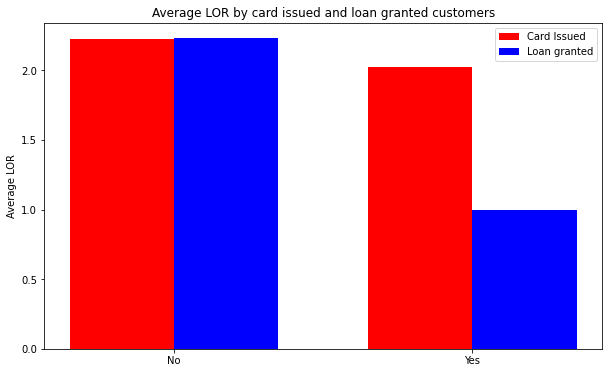

In [50]:
# Plot Average LOR by card issued and loan granted customers

LOR_card = basetable_df.groupby('Card Issued')['LOR'].agg('mean')
LOR_card = LOR_card.to_frame()
LOR_loan = basetable_df.groupby('loan granted')['LOR'].agg('mean')
LOR_loan = LOR_loan.to_frame()

fig, ax = plt.subplots(figsize=(10,6))
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'No'
labels[1] = 'Yes'
ax.set_xticklabels(labels)

width = 0.35      
plt.bar(LOR_card.index, LOR_card['LOR'], width, color='red', label='Card Issued')
plt.bar(LOR_loan.index + width, LOR_loan['LOR'], width, color='blue', label='Loan granted')

fig.canvas.draw()

plt.ylabel('Average LOR')
plt.title('Average LOR by card issued and loan granted customers')
ax.legend()
ax.set_xticks([0.175, 1.175])

plt.show()

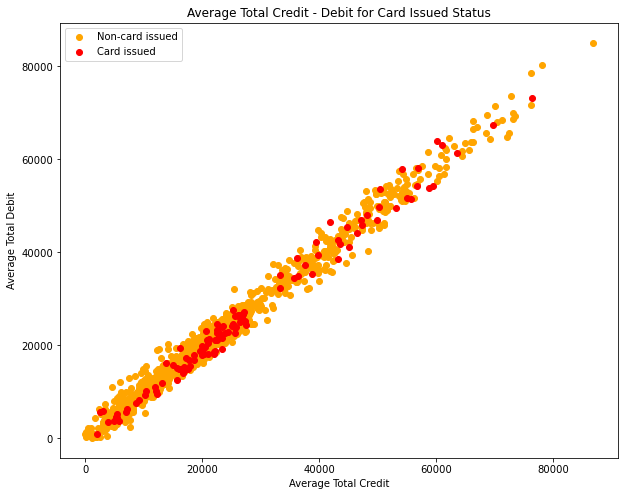

In [51]:
# Plot Average Total Credit - Debit for Card Issued Status

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(basetable[basetable['Card Issued'] == 0]['Average Total Credit'],
                 basetable[basetable['Card Issued'] == 0]['Average Total Debit'], color='orange', label='Non-card issued')
ax.scatter(basetable[basetable['Card Issued'] == 1]['Average Total Credit'],
                 basetable[basetable['Card Issued'] == 1]['Average Total Debit'], color='red', label='Card issued')


ax.set_xlabel('Average Total Credit')
ax.set_ylabel('Average Total Debit')
ax.set_title('Average Total Credit - Debit for Card Issued Status')
ax.legend()

plt.show()

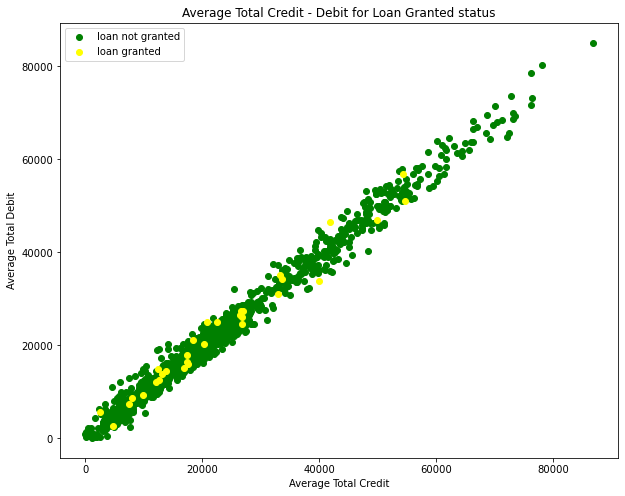

In [52]:
# Plot Average Total Credit - Debit for Loan Granted status

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(basetable[basetable['loan granted'] == 0]['Average Total Credit'],
                 basetable[basetable['loan granted'] == 0]['Average Total Debit'], color='green', label='loan not granted')
ax.scatter(basetable[basetable['loan granted'] == 1]['Average Total Credit'],
                 basetable[basetable['loan granted'] == 1]['Average Total Debit'], color='yellow', label='loan granted')


ax.set_xlabel('Average Total Credit')
ax.set_ylabel('Average Total Debit')
ax.set_title('Average Total Credit - Debit for Loan Granted status')
ax.legend()

plt.show()

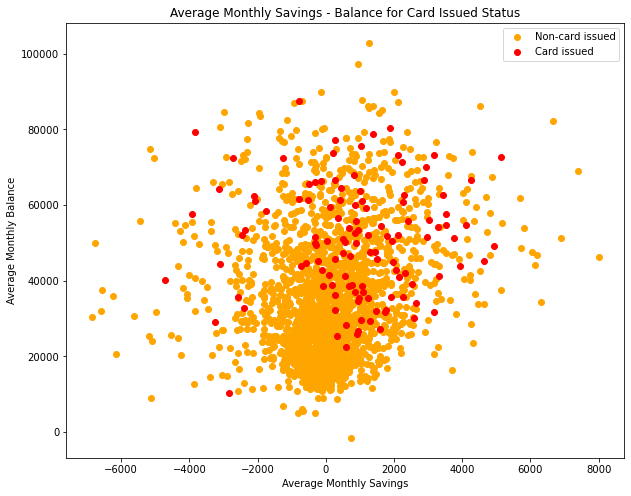

In [53]:
# Average Monthly Savings - Balance for Card Issued Status

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(basetable[basetable['Card Issued'] == 0]['Average Monthly Savings'],
                 basetable[basetable['Card Issued'] == 0]['Average Monthly Balance'], color='orange', label='Non-card issued')
ax.scatter(basetable[basetable['Card Issued'] == 1]['Average Monthly Savings'],
                 basetable[basetable['Card Issued'] == 1]['Average Monthly Balance'], color='red', label='Card issued')


ax.set_xlabel('Average Monthly Savings')
ax.set_ylabel('Average Monthly Balance')
ax.set_title('Average Monthly Savings - Balance for Card Issued Status')
ax.legend()

plt.show()

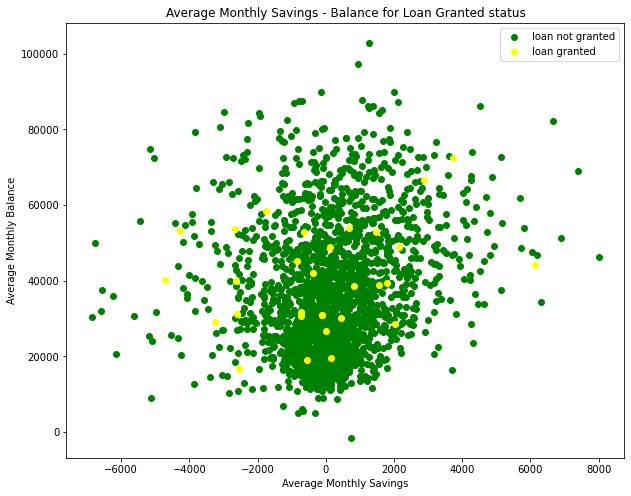

In [54]:
# Plot Average Monthly Savings - Balance for Loan Granted status

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(basetable[basetable['loan granted'] == 0]['Average Monthly Savings'],
                 basetable[basetable['loan granted'] == 0]['Average Monthly Balance'], color='green', label='loan not granted')
ax.scatter(basetable[basetable['loan granted'] == 1]['Average Monthly Savings'],
                 basetable[basetable['loan granted'] == 1]['Average Monthly Balance'], color='yellow', label='loan granted')


ax.set_xlabel('Average Monthly Savings')
ax.set_ylabel('Average Monthly Balance')
ax.set_title('Average Monthly Savings - Balance for Loan Granted status')
ax.legend()

plt.show()

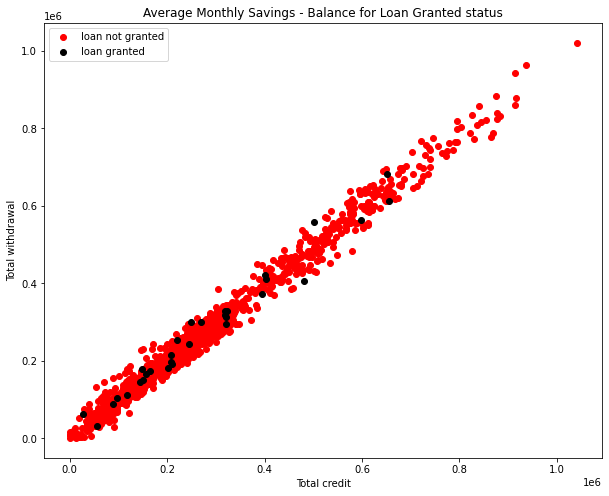

In [55]:
# Plot Average Monthly Savings - Balance for Loan Granted status

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(basetable[basetable['loan granted'] == 0]['total_credit'],
                 basetable[basetable['loan granted'] == 0]['total_withdrawal'], color='red', label='loan not granted')
ax.scatter(basetable[basetable['loan granted'] == 1]['total_credit'],
                 basetable[basetable['loan granted'] == 1]['total_withdrawal'], color='black', label='loan granted')


ax.set_xlabel('Total credit')
ax.set_ylabel('Total withdrawal')
ax.set_title('Average Monthly Savings - Balance for Loan Granted status')
ax.legend()

plt.show()

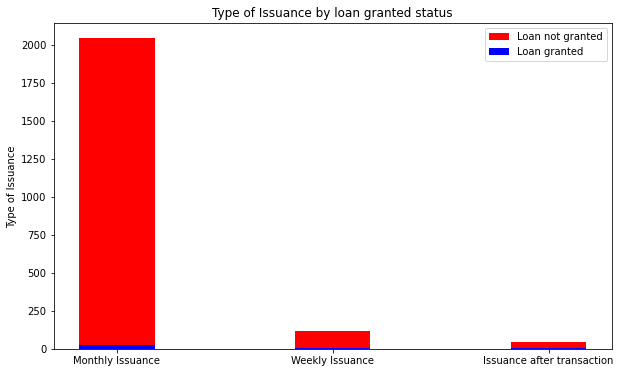

In [56]:
# Plot Type of Issuance by loan granted status

loan_granted_issuance = basetable[basetable["loan granted"] == 1]["frequency"].value_counts()
loan_granted_issuance = loan_granted_issuance.to_frame()

loan_not_granted_issuance = basetable[basetable["loan granted"] == 0]["frequency"].value_counts()
loan_not_granted_issuance = loan_not_granted_issuance.to_frame()

fig, ax = plt.subplots(figsize=(10,6))
width = 0.35

plt.bar(loan_not_granted_issuance.index, loan_not_granted_issuance['frequency'], width, color='red', label='Loan not granted')

plt.bar(loan_granted_issuance.index, loan_granted_issuance['frequency'], width, color='blue', label='Loan granted')


plt.ylabel('Type of Issuance')
plt.title('Type of Issuance by loan granted status')
ax.legend()

plt.show()